<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**

Привет! Меня зовут Холоденин Сергей.
    
Рад знакомству, спасибо за проверку моей работы, постараюсь учесть все твои комментарии и поправить код.

</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

1. В таблице 22 колонки, в 14 из которых есть пропущенные значения.
2. Пропущенные значения в столбце ceiling_height можно заменить стандартной высотой потолка.
3. В столбце floors_total немного пропущенных значений, можно заменить наиболее встречающимся значением в регионе.
4. В столбце living_area пропуски заполнить по медианному значению % площади от общей площади квартиры, при этом учтиывая значения студия ли это или открытая планировка.
5. В столбце is_apartment заменить значения на булевскую логику True/False/
6. В столбце kitchen_area пропущенные значения заполнить по аналогии со столбцом living_area.
7. В столбце balcony пропущенные значения заменить на 0.
8. В столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest количество в пропущенных значениях заменить на ноль, а дальность на медианное значение по столбцу. 
9. В столбце days_exposition пропущенные значения высчитать исходя из даты публикации.

In [8]:
columns = list(df)
data = {'Замена типа': df.dtypes, 'Пропуски': df.isna().sum()}
datatype = pd.DataFrame(data)
datatype.index.name = 'Столбец'
datatype.reset_index(inplace=True)
datatype = datatype.replace(0,'не требуется')
datatype.loc[2, 'Замена типа'] = 'не требуется'
datatype.loc[5, 'Замена типа'] = 'не требуется'
datatype.loc[7, 'Замена типа'] = 'не требуется'
datatype.loc[12, 'Замена типа'] = 'не требуется'
datatype.loc[9, 'Замена типа'] = 'bool'
datatype.loc[0, 'Замена типа'] = 'не требуется'
datatype.loc[4, 'Замена типа'] = 'не требуется'
datatype.loc[8, 'Замена типа'] = 'не требуется'
datatype.loc[3, 'Замена типа'] = 'datatype'
datatype.loc[14, 'Замена типа'] = 'str'
datatype.loc[10:11, 'Замена типа'] = 'не требуется'
datatype.loc[9, 'Пропуски'] = 'False'
datatype.loc[5:7, 'Пропуски'] = 'Median'
datatype.loc[12, 'Пропуски'] = 'Median'
datatype.loc[13, 'Пропуски'] = 0
datatype.loc[15:16, 'Пропуски'] = 'Median'
datatype.loc[17:21, 'Пропуски'] = 'не требуется'
datatype = datatype.replace('float64','int')

datatype
                


,Столбец,Замена типа,Пропуски
0,total_images,не требуется,не требуется
1,last_price,int,не требуется
2,total_area,не требуется,не требуется
3,first_day_exposition,datatype,не требуется
4,rooms,не требуется,не требуется
5,ceiling_height,не требуется,Median
6,floors_total,int,Median
7,living_area,не требуется,Median
8,floor,не требуется,не требуется
9,is_apartment,bool,False


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Да, ты выбрал правильные методы для просмотра сырых данных. В целом ты верно указал проблемы. Возможно удобнее сделать табличкой, чтоб систематизировать наши находки
    
Например, так    
    
| Столбец        | Замена типа           | Пропуски  |
| ------------- |:-------------:| -----:|
| balcony     | int | 0 |
| is_appartment     | bool      |   False |
| days_expoition | int     |    не требуется |
| total_area	 | не требуется    |    не требуется |
    
Возможно на предобработке так будет легче ориентироваться

Также для вывода таблиц луше использовать display, а не print
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**

Последовал совету и создал сводную таблицу для удобства просмотра нужных изменений.

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Ок, отлично получилось
    
</div>

## Предобработка данных

Посмотрим наиболее частое значение высоты потолка:

In [9]:
df.groupby('ceiling_height')['ceiling_height'].count().sort_values(ascending=False).head(15)

ceiling_height
2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
2.55     980
2.75     910
2.65     676
3.20     277
3.10     203
2.90     164
3.30     141
2.56     139
3.50     130
2.57     103
Name: ceiling_height, dtype: int64

Также проверим на ошибки введенные данные:

In [10]:
df.groupby('ceiling_height')['ceiling_height'].count().sort_values(ascending=True).head(40)

ceiling_height
1.00     1
3.98     1
3.93     1
3.88     1
3.87     1
3.84     1
3.83     1
3.82     1
3.76     1
4.06     1
3.69     1
3.59     1
3.58     1
3.48     1
3.44     1
3.43     1
3.42     1
3.39     1
3.29     1
3.68     1
4.14     1
4.15     1
4.25     1
27.50    1
26.00    1
24.00    1
22.60    1
20.00    1
14.00    1
10.30    1
8.30     1
6.00     1
5.80     1
5.60     1
5.50     1
5.20     1
5.00     1
4.90     1
4.80     1
4.65     1
Name: ceiling_height, dtype: int64

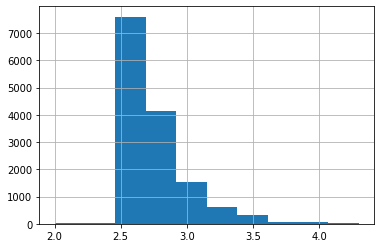

In [11]:
df['ceiling_height'].hist(bins=10, range=(2,4.3))
plt.show()


Пропущенные значения по высоте потолков заменяю на медианное значение.

In [12]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())




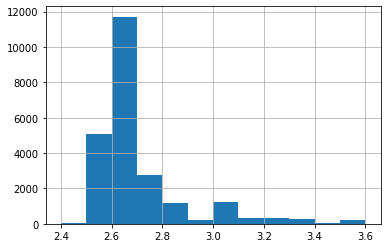

In [13]:
df['ceiling_height'].hist(bins=12, range=(2.4,3.6))
plt.show()

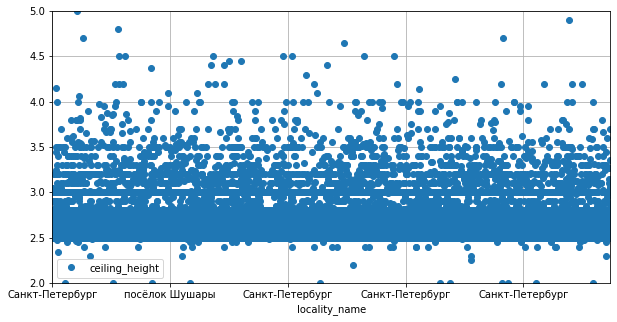

In [14]:
df.plot(x='locality_name', 
y='ceiling_height',
style='o', 
ylim=(2, 5), 
figsize=(10, 5),
grid=True) 

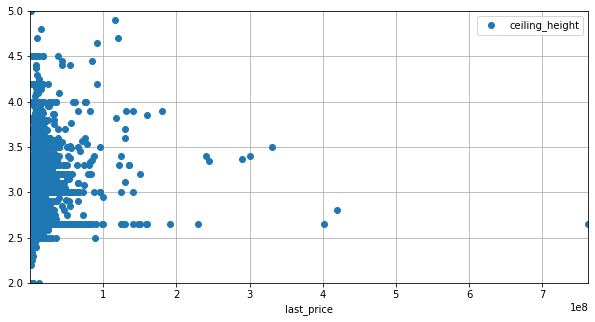

In [15]:
df.plot(x='last_price', 
y='ceiling_height',
style='o', ylim=(2, 5), figsize=(10, 5), grid=True) 

Посмотрим сколькиэтажные дома встречаются чаще:

In [16]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

Т.к. пропущенных значений немного, то заменим пропуски на медианное значение, это не критично.

In [17]:
floors_median = df['floors_total'].median()
df['floors_total'] = df['floors_total'].fillna(floors_median)
df['floors_total'].isna().sum()

0

Для того, чтобы понять, какое значение вставить в пропусках столбца с жилой площадью, создам столбец с % этой площади от общей, посмотрю распределение и медианное значение по всем квартирам, а также в разрезе студий и открытой планировки.

0.5678598992678503

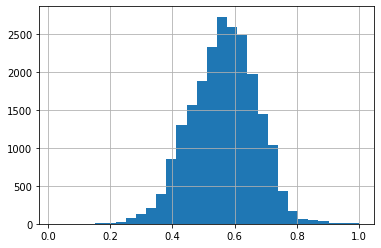

In [18]:
df['percent_living_area'] = df['living_area']/df['total_area']
df['percent_living_area'].hist(bins=30)
df['percent_living_area'].median()

0.6894049346879536

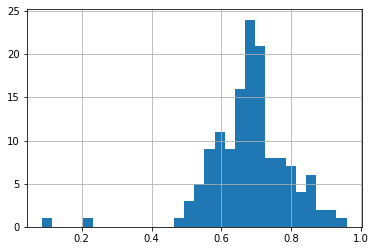

In [19]:
living_area_studio=df.query('studio == True')
living_area_studio['percent_living_area'].hist(bins=30)
living_area_studio['percent_living_area'].median()


In [20]:
living_area_studio['percent_living_area'].isna().sum()

10

У студии значительно выше жилая площадь в сравнении с обычной планировкой, но пропущенных значений всего 10, их можно заполнить медианным значением для общей выборки.

0.6831492080393984

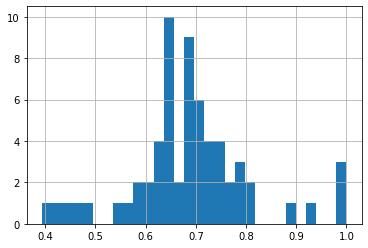

In [21]:
living_area_open_plan=df.query('open_plan == True')
living_area_open_plan['percent_living_area'].hist(bins=30)
living_area_open_plan['percent_living_area'].median()


In [22]:
living_area_open_plan['percent_living_area'].isna().sum()

5

Аналогично и для открытой планировки. Здесь всего 5 не заполненных значений.

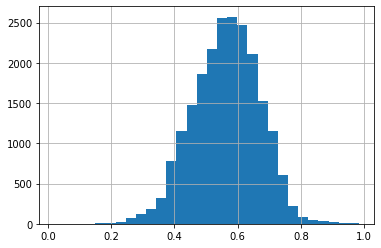

In [23]:
living_area_else=df.query('open_plan != True and studio != True')
living_area_else['percent_living_area'].hist(bins=30)
living_area_median = living_area_else['percent_living_area'].median()

In [24]:
df['percent_living_area'] = df['percent_living_area'].fillna(living_area_median)
df['percent_living_area'].isna().sum()

0

Заполняю медианным значением % для общей выборки в столбец и перемножаю столбцы общей площади и % для пустых значений жилой площади. Пропуски заполнены:

In [25]:
df['living_area_ind']=df['living_area'].isna()
def living_area_change(row):
    living_area_ind = row['living_area_ind']
    living_area = row['living_area']
    total_area = row['total_area']
    percent_living_area = row['percent_living_area']
    if living_area_ind == True:
        return total_area*percent_living_area
    return living_area
df['living_area']=df.apply(living_area_change, axis=1)
df.head()

Столбец,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,percent_living_area,living_area_ind
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,False
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,False
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,False
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.1,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.566667,True
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,False


In [26]:
df['living_area'].isna().sum()

0

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Отличная идея с долей жилой площади. Думаю можно было сделать немного компактнее, просто рассчитать медиану процента, а затем с помощью fillna и apply заполнить пропуски из рассчета. Не совсем понятно значение твоего столбца ind, поиск пропусков намного эффективнее осуществляется fillna (т.е. обработать именно строки с пропусками) или isnan (для быстрого поиска таких пропусков).
    
    median_living = (data['living_area'] / data['total_area']).median()
    data['living_area'] = data.apply((lambda x: \
        x['total_area'] * median_living \
        if math.isnan(x['living_area']) \
        else x['living_area']), axis = 1)
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**
С лямда функцией был знаком поверхностно, поэтому не до конца пока понимаю, как и где ее применить, буду тренироваться. Просто я создал столбец индикатор, где требуется замена пустого занчения, короче усложнил, но обязательно возьму на вооружение твой пример.

</div>

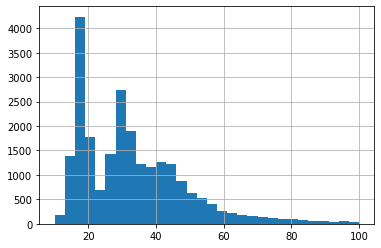

In [27]:
df['living_area'].hist(bins=30, range=(10,100))

Заменяю все пропущенные значения по апартаментам на False:

In [28]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

Теперь заменим пропуски в столбце с площадью кухни. Для этого создаю столбец с % площади кухни от общей. Медианное значение вставлю вместо пропусков, т.к. по студии и открытой планировке нет ни одного значения (кухня входит в жилую площадь, поэтому данные пропуски проставлю нулями).

0.1724137931034483

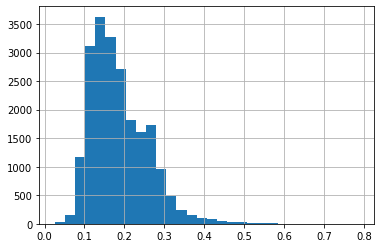

In [29]:
df['percent_kitchen_area'] = df['kitchen_area']/df['total_area']
df['percent_kitchen_area'].hist(bins=30)
df['percent_kitchen_area'].median()

In [30]:
kitchen_area_studio=df.query('studio == True')
kitchen_area_studio['percent_kitchen_area'].count()

0

In [31]:
df['studio'].sum()

149

In [32]:
kitchen_area_open_plan=df.query('open_plan == True')
kitchen_area_open_plan['percent_kitchen_area'].count()

0

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Здесь не понятно решение с пустыми гистограммами. Если ты хочешь показать, что каких-то записей нет, то посчитай их количество и получи 0, так очень странно смотрится
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**

Посчитал, как ты и посоветовала, действительно так лучше.)

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Отлично, да теперь все понятнее
    
</div>

In [33]:
df['open_plan'].sum()

67

In [34]:
percent_kitchen_area_median = df['percent_kitchen_area'].median()

In [35]:
df['kitchen_area_ind']=df['kitchen_area'].isna()
def kitchen_area_change(row):
    kitchen_area_ind = row['kitchen_area_ind']
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    studio = row['studio']
    open_plan = row['open_plan']
    if studio == True or open_plan == True:
        return 0
    if kitchen_area_ind == True:
        return total_area*percent_kitchen_area_median
    return kitchen_area
df['kitchen_area']=df.apply(kitchen_area_change, axis=1)
df.head()

Столбец,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,percent_living_area,living_area_ind,percent_kitchen_area,kitchen_area_ind
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,False,0.231481,False
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,False,0.272277,False
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,False,0.148214,False
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.1,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,0.566667,True,NaN,True
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,False,0.410000,False


In [36]:
df['kitchen_area'].isna().sum()

0

В столбце balcony пропущенные значения будем считать за отсутствие балконов, т.е. равны 0.

In [37]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

Создадим для удобства столбец с булевской логикой по столбцу locality_name, чтобы понимать город это или область.

In [38]:
df['locality_name'].value_counts()

Санкт-Петербург          15721
посёлок Мурино             522
посёлок Шушары             440
Всеволожск                 398
Пушкин                     369
                         ...  
деревня Сижно                1
деревня Трубников Бор        1
посёлок Плоское              1
посёлок Коробицыно           1
деревня Каськово             1
Name: locality_name, Length: 364, dtype: int64

In [39]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё','е')
df['locality_name'] = df['locality_name'].str.replace('деревня','поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок ','')
df['locality_name'].value_counts().head(25)

санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
петергоф             201
сестрорецк           183
красное село         178
новое девяткино      144
сертолово            142
ломоносов            133
кириши               125
бугры                114
сланцы               112
волхов               111
тосно                104
кингисепп            104
кронштадт             96
никольское            93
коммунар              89
Name: locality_name, dtype: int64

In [40]:
def loc(row):
    locality_name = row['locality_name']
    if locality_name == 'санкт-петербург':
        return True
    return False
df['in_city'] = df.apply(loc, axis=1)
df['in_city'].sum()

15721

In [41]:
df['locality_name'] = df['locality_name'].fillna('санкт-петербург')

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ок, введение нового столбца для удобства отличный вариант. Но вот с самим столбцом нужно поработать подробнее. Это текст, написанный произвольно, а значит в нем возможны разные ошибки, опечатки или просто разное написание. Это всегда нужно подробно рассматривать.
    
    
Как минимум стоит заменить ё на е, сделать все lowercase и убрать лишние пропуски. Здесь есть и другие проблемы, которые мы отметим позже
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**

Действительно, после замены ё на е, выравнивания по высоте, я увидел, что названия одних и тех же населенных пунктов написаны со словом поселок и без, убрав лишнее, у меня получился более правильный столбец.

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Да, это очень правильное дополнение. Теперь любая шруппировка по населенным пунктам будет верной
    
</div>

Скорректируем название столбца для удаленности от центра:

In [42]:
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

Заполним медианным значением пропуски в нем:

In [43]:
city_centers_nearest_median = df['city_centers_nearest'].median()
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(city_centers_nearest_median)
df['city_centers_nearest'].isna().sum()

0

Аналогично заменим медианным значением для остальных удаленностей, т.к. это не основные значения в данной работе.

In [44]:
airports_nearest_median = df['airports_nearest'].median()
df['airports_nearest'] = df['airports_nearest'].fillna(airports_nearest_median)
df['airports_nearest'].isna().sum()

0

In [45]:
parks_nearest_median = df['parks_nearest'].median()
df['parks_nearest'] = df['parks_nearest'].fillna(parks_nearest_median)
df['parks_nearest'].isna().sum()

0

In [46]:
ponds_nearest_median = df['ponds_nearest'].median()
df['ponds_nearest'] = df['ponds_nearest'].fillna(ponds_nearest_median)
df['ponds_nearest'].isna().sum()

0

Для столбцов parks_around3000 и ponds_around3000 пропущенные значения заменим на 0.

In [47]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'].isna().sum()

0

In [48]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().sum()

0

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Геоданные лучше было оставить без изменения. Пропусков там слишком много, а надежного способа для оправданного заполнения у нас нет.
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**

На будущее учту, а так решил не убирать, пусть будут уже=).

</div>

Теперь проверим когда данные были сняты, чтобы вычислить значения для пропусков в столбце days_exposition. Предположительно максимальное значение по столбцу first_day_exposition - это последняя дата выгрузки. Отсюда рассчитываю разницу в днях и вставляю пропущенные значения.

In [49]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['days_exposition'] = df['days_exposition'].fillna(0)
first_day_exposition_max = df['first_day_exposition'].max()
df['days_exposition_fix'] = ((first_day_exposition_max - df['first_day_exposition']).astype('int')/(3600*24*1000000000)).astype('int')
def days(row):
    days_exposition = row['days_exposition']
    days_exposition_fix = row['days_exposition_fix']
    if days_exposition == 0:
        return days_exposition_fix
    return days_exposition
df['days_exposition'] = df.apply(days, axis=1)
df.head()


Столбец,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,percent_living_area,living_area_ind,percent_kitchen_area,kitchen_area_ind,in_city,days_exposition_fix
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,57.0,0.472222,False,0.231481,False,True,57
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,455.0,0.0,502.0,81.0,0.460396,False,0.272277,False,False,150
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,0.612500,False,0.148214,False,True,1352
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.1,9,False,...,84.0,3.0,234.0,424.0,0.566667,True,NaN,True,True,1379
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,0.320000,False,0.410000,False,True,318


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_a

Меняю типы данных по столбцам, кроме высоты потолка и площадей, т.к. там потребуется данные после запятой, в остальных же значениях изменение типов данных поможет округлить значения и сделать их более доступными для восприятия при просмотре таблицы..

In [51]:
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['airports_nearest'] = df['airports_nearest'].astype('int')
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['parks_nearest'] = df['parks_nearest'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['ponds_nearest'] = df['ponds_nearest'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
df['locality_name'] = df['locality_name'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
city_centers_nearest    23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Типы данных ты здорово оптимизировал, молодец.
    
</div>

## Расчёты и добавление результатов в таблицу

По заданию требуется добавить данные:
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.
Последний пункт уже выполнен еще предобработке данных в столбцах percent_living_area и percent_kitchen_area.
Создадим столбик с ценой квадратного метра price_m2.

In [52]:
df.head()

Столбец,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,percent_living_area,living_area_ind,percent_kitchen_area,kitchen_area_ind,in_city,days_exposition_fix
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755,57,0.472222,False,0.231481,False,True,57
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,455,0,502,81,0.460396,False,0.272277,False,False,150
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90,2,574,558,0.612500,False,0.148214,False,True,1352
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.1,9,False,...,84,3,234,424,0.566667,True,NaN,True,True,1379
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121,0.320000,False,0.410000,False,True,318


In [53]:
df['price_m2'] = df['last_price']/df['total_area']
df['price_m2'] = df['price_m2'].astype('int')
df.head()

Столбец,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,percent_living_area,living_area_ind,percent_kitchen_area,kitchen_area_ind,in_city,days_exposition_fix,price_m2
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,57,0.472222,False,0.231481,False,True,57,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,502,81,0.460396,False,0.272277,False,False,150,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574,558,0.612500,False,0.148214,False,True,1352,92785
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.1,9,False,...,3,234,424,0.566667,True,NaN,True,True,1379,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,0.320000,False,0.410000,False,True,318,100000


Создадим столбцы день недели, месяц и год публикации объявления - week_day, month, year.

In [54]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head()

Столбец,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,percent_living_area,living_area_ind,percent_kitchen_area,kitchen_area_ind,in_city,days_exposition_fix,price_m2,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0.472222,False,0.231481,False,True,57,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.460396,False,0.272277,False,False,150,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0.612500,False,0.148214,False,True,1352,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.1,9,False,...,0.566667,True,NaN,True,True,1379,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0.320000,False,0.410000,False,True,318,100000,1,6,2018


Создадим категоризацию по этажу квартиры; варианты — первый, последний, другой.

In [55]:
def floor_cat(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
df['floor_category'] = df.apply(floor_cat, axis=1)
df.head()

Столбец,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_ind,percent_kitchen_area,kitchen_area_ind,in_city,days_exposition_fix,price_m2,weekday,month,year,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,False,0.231481,False,True,57,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,False,0.272277,False,False,150,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,False,0.148214,False,True,1352,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.1,9,False,...,True,NaN,True,True,1379,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,False,0.410000,False,True,318,100000,1,6,2018,другой


In [56]:
df.duplicated().sum()

0

Все данные успешно добавлены, проведем исследовательский анализ.

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ок, данные подготовылены к анализу.
    
Но вот про проверку дубликатов не стоило забывать.
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**

Проверил, дубликатов 0. Можно смело идти дальше=)

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Да, дублей часто будет 0, но пропускать это шаг никогда не нужно
    
</div>

## Исследовательский анализ данных

1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

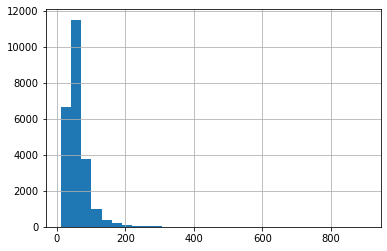

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

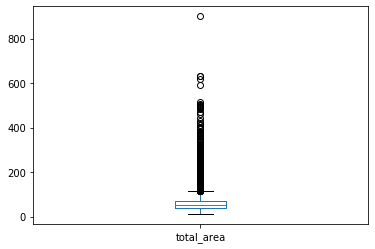

In [57]:
def analize(name):
    name.hist(bins=30)
    plt.show()
    display(name.describe())
    name.plot(kind='box')
    plt.show()
    
analize(df['total_area'])        

Гистограмма площади выглядит как распределение Пуассона, на boxplot видны выбросы и редкие значения, которые можно отбросить, тогда распределение будет более четким:

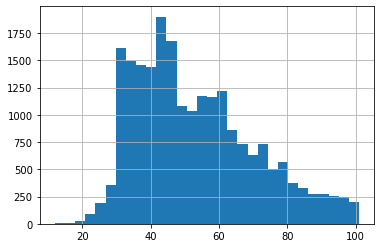

count    21917.000000
mean        53.046917
std         17.684990
min         12.000000
25%         39.000000
50%         50.000000
75%         64.000000
max        101.000000
Name: total_area, dtype: float64

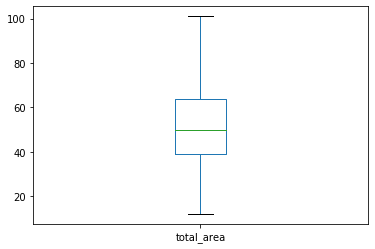

In [58]:
good_total_area = df.query('total_area <= 101')
analize(good_total_area['total_area'])

Теперь изучим цену, распределение имеет пик в районе 4,65 млн.

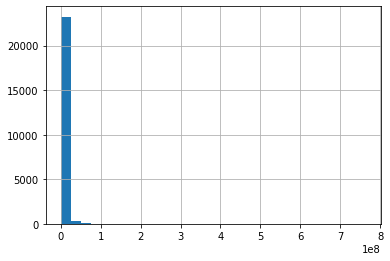

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

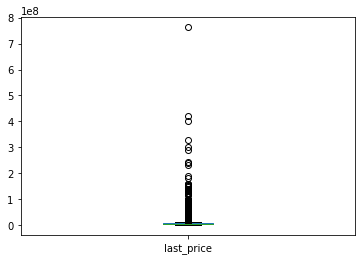

In [59]:
analize(df['last_price'])

Большое количество выбросов справа, откинем их.

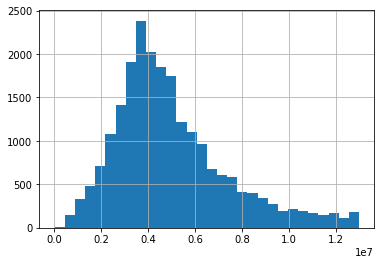

count    2.206300e+04
mean     4.986647e+06
std      2.433131e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.490000e+06
75%      6.150000e+06
max      1.300000e+07
Name: last_price, dtype: float64

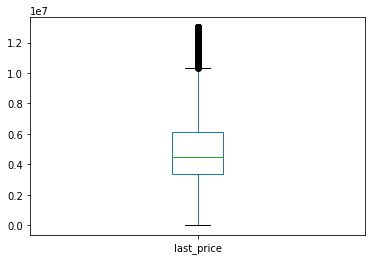

In [60]:
good_last_price = df.query('last_price <= 13000000')
analize(good_last_price['last_price'])

Теперь видно нормальное распределение выборки. Изучим количество комнат.

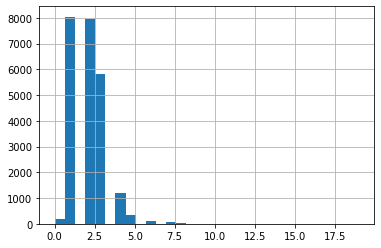

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

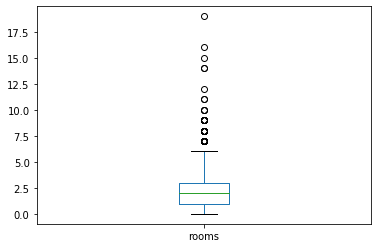

In [61]:
analize(df['rooms'])

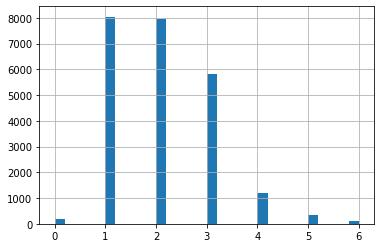

count    23609.000000
mean         2.047905
std          1.006772
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

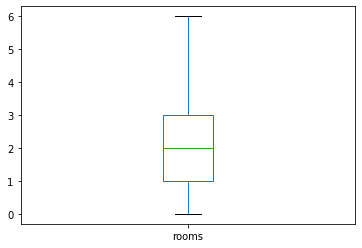

In [62]:
good_rooms = df.query('rooms <= 6')
analize(good_rooms['rooms'])

Достаточно исследовать выборку до 6 комнат, тогда выбросы не влияют на выборку. Изучим высоту потолков.

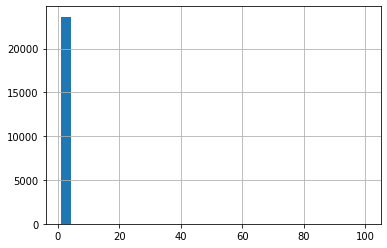

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

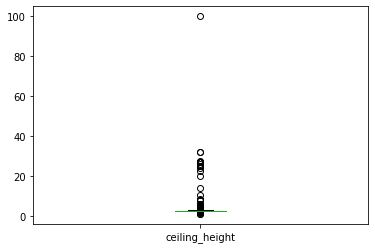

In [63]:
analize(df['ceiling_height'])

Оптимальными границами будет диапазон от 2,45 до 2,78. Но тогда слишком много значений будет отброшено, если установить высоту 3.7, то дисперсия не слишком увеличится, при этом сохранится большее число значений. Это позволит более точно определить корреляцию.

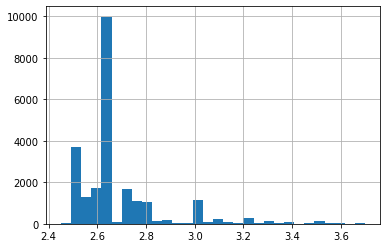

count    23476.000000
mean         2.688740
std          0.187756
min          2.450000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.700000
Name: ceiling_height, dtype: float64

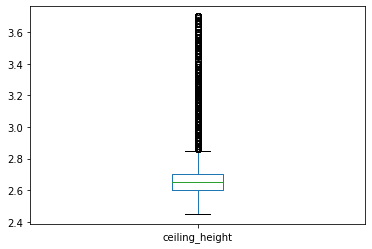

In [64]:
good_ceiling_height = df.query('2.45 <= ceiling_height <=3.7')
analize(good_ceiling_height['ceiling_height'])

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Хорошо, но видно, что для просмотра данных мы используем однотипные операции. Думаю их стоит обернуть в функцию (гистограмма, boxplot и describe) и применить эту функцию в цикле ко всем столбцам
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**

Для удобства создал функцию analize и обернул столбцы в эту функцию.

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Отлично
    
</div>

Объединим значения в новый DataFrame и посмотрим количество значений в нем.

In [65]:
df_good = df.query('total_area <= 101 and last_price <= 13000000 and rooms <= 6 and 2.45 <= ceiling_height <=3.7')
df_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21333 entries, 1 to 23698
Data columns (total 33 columns):
total_images            21333 non-null int64
last_price              21333 non-null int64
total_area              21333 non-null float64
first_day_exposition    21333 non-null datetime64[ns]
rooms                   21333 non-null int64
ceiling_height          21333 non-null float64
floors_total            21333 non-null int64
living_area             21333 non-null float64
floor                   21333 non-null int64
is_apartment            21333 non-null bool
studio                  21333 non-null bool
open_plan               21333 non-null bool
kitchen_area            21333 non-null float64
balcony                 21333 non-null int64
locality_name           21333 non-null object
airports_nearest        21333 non-null int64
city_centers_nearest    21333 non-null int64
parks_around3000        21333 non-null int64
parks_nearest           21333 non-null int64
ponds_around3000     

In [66]:
len(df_good)/len(df)

0.90016456390565

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Посмотри, какой процент данных мы удалили. Тебя не смущает, что мы с легкостью выбрасили больше половины собранных для нас данных? Так делать нельзя. Аномалии это 3-5% данных, ну точно не больше 10%.
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**

После удаления выбросов удалось сохранить более 90% данных, что не есть хорошо, но позволяет дать более точный анализ..

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Вот теперь данные очищены правильно, молодец
    
</div>

2. Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишим, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

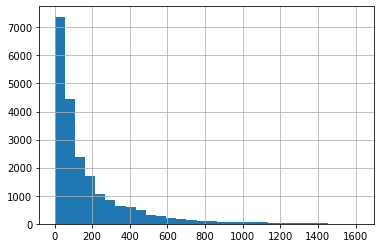

count    21333.000000
mean       173.283973
std        217.940599
min          0.000000
25%         41.000000
50%         89.000000
75%        218.000000
max       1618.000000
Name: days_exposition, dtype: float64

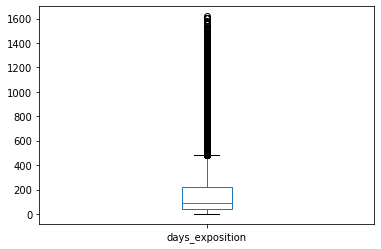

In [67]:
analize(df_good['days_exposition'])

Из распределения видно, что обычно продажа квартиры занимает 89 дней, необычно быстро проходят продажи, если прошло не больше 39 дней, есть наблюдения, когда 0 дней, что возможно выбросы, нужно проверить. (Т.к. все пропущенные значения были посчитаны вычетом от последнего опубликованного, то возможно это обЪявление и является лишним.) Необычайно долго - это продажи свыше 223 дней, есть даже 1618 дней (4,4 года). Отбросим все редкие и необычные значения, при этом отсечем до 2 лет, пусть и остануться выбросы, это вполне реальные сроки продажи квартиры и так мы не потеряем слишком много данных.

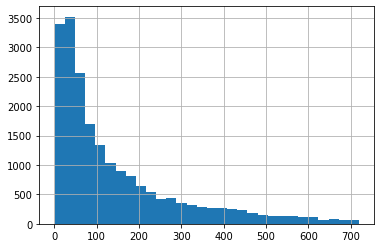

count    20557.000000
mean       143.897115
std        151.978280
min          1.000000
25%         39.000000
50%         84.000000
75%        197.000000
max        720.000000
Name: days_exposition, dtype: float64

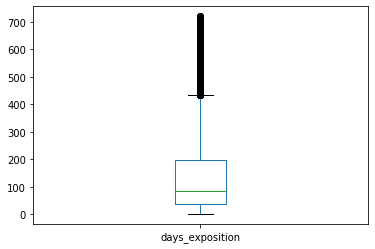

In [68]:
df_good_days_exposition = df_good.query('0 < days_exposition <= 720')
analize(df_good_days_exposition['days_exposition'])

После того, как были отсечены выбросы, картина изменилась, теперь квартира продается обычно в течение 84 дней, быстрая продажа до 39 дней, а долгая свыше 197 дней.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

А здесь мы еще данные выбросили?
    
По сути все верно сделано в плане анализа времени, но вот нельзя по итогам выкидывать так много данных, которые отличаются от среднего результата.
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**
    
Сохранил часть выбросов, т.к. это более редкие значения, но реалистичные для продажи квартиры по срокам. Это позволило сохранить большую часть данных и увидеть более реалистичные цифры. Я связываю это с тем, что часть объявлений скорее всего переоткрываются с новыми данными. Также возможны быстрые продажи в новосройках на окраинах и более долгие в центре из-за цены и инфраструктуры. 

</div>

3. Изучим какие факторы больше всего влияют на стоимость квартиры. Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [69]:
price_area_rooms_city_centers_nearest = df_good_days_exposition[['last_price', 'total_area', 'rooms','ceiling_height','percent_living_area', 'percent_kitchen_area', 'airports_nearest','parks_nearest','ponds_nearest', 'city_centers_nearest']]
price_area_rooms_city_centers_nearest.head()

Столбец,last_price,total_area,rooms,ceiling_height,percent_living_area,percent_kitchen_area,airports_nearest,parks_nearest,ponds_nearest,city_centers_nearest
1,3350000,40.4,1,2.65,0.460396,0.272277,12817,455,502,18603
2,5196000,56.0,2,2.65,0.612500,0.148214,21741,90,574,13933
4,10000000,100.0,2,3.03,0.320000,0.410000,31856,112,48,8098
5,2890000,30.4,1,2.65,0.473684,0.299342,26726,455,502,13098
6,3700000,37.3,1,2.65,0.284182,0.386059,52996,455,502,19143


<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Здесь не совсем понятно, почему ты такой небольшой набор параметров выбрал для анализа? А например, высота потолков, расстояние до аэропорта, количество парков и прудов, количество этажей в доме? Это точно не влияет на цену? А где это показано?
    
    
Опять же не стоит не правильно делать предварительные выводы и дегко исключать из рассмотрения параметры, которые кажутся не важными. Так можно пропустить важные инсайты.
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**
    
Добавил столбцы и по более полным данным нашел зависимость от удаленности от центра.

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Ок. Хотя думаю sctter_plot по всем столбцам излишен. Его как раз можно построить по избранным столбцам. А вот матрицу корреляций можно было построить. Она компактнее и по ней можно выбрать нужный набор столбцов
    
</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4982d40450>,
      dtype=object)

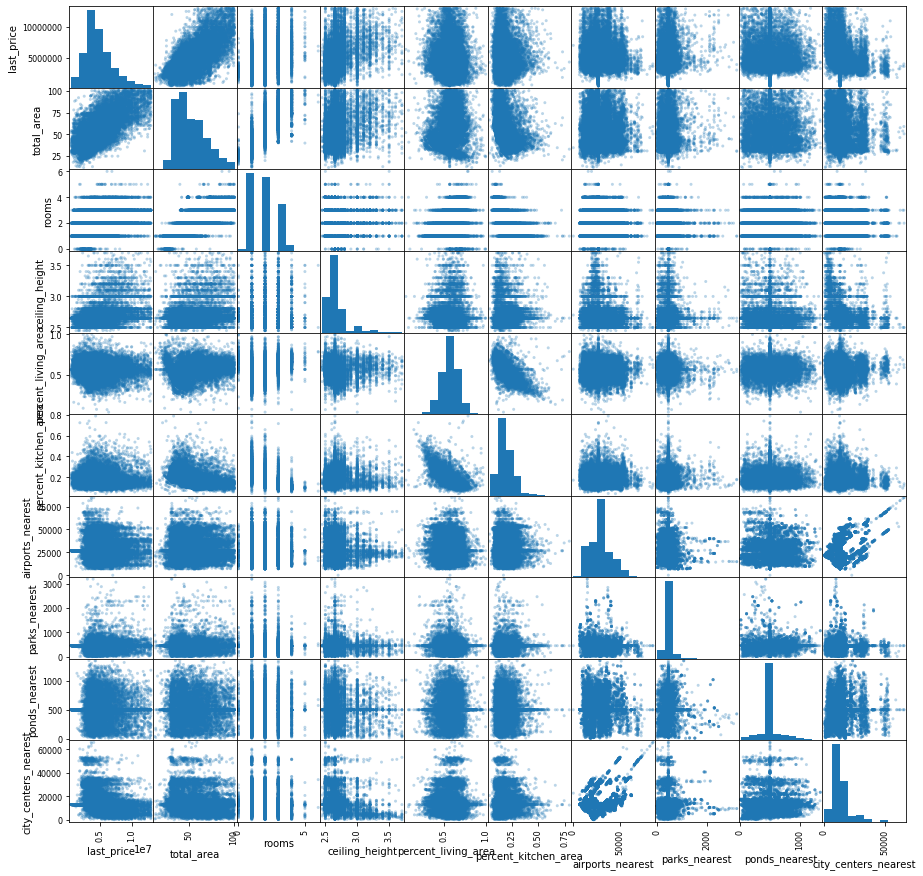

In [70]:
 pd.plotting.scatter_matrix(price_area_rooms_city_centers_nearest, figsize=(15,15), alpha=0.3)

In [71]:
price_area_rooms_city_centers_nearest.corr()

Столбец,last_price,total_area,rooms,ceiling_height,percent_living_area,percent_kitchen_area,airports_nearest,parks_nearest,ponds_nearest,city_centers_nearest
Столбец,,,,,,,,,,
last_price,1.000000,0.693145,0.418290,0.349691,0.007610,-0.095257,0.014576,0.047897,-0.010365,-0.219420
total_area,0.693145,1.000000,0.797830,0.247251,0.233915,-0.417755,-0.002107,0.011499,-0.012060,-0.089789
rooms,0.418290,0.797830,1.000000,0.061098,0.544026,-0.658316,-0.029861,-0.018607,-0.001614,-0.050259
ceiling_height,0.349691,0.247251,0.061098,1.000000,-0.067632,0.081789,-0.059202,-0.032571,-0.048865,-0.206037
percent_living_area,0.007610,0.233915,0.544026,-0.067632,1.000000,-0.734461,-0.064622,-0.041260,0.011455,-0.016422
percent_kitchen_area,-0.095257,-0.417755,-0.658316,0.081789,-0.734461,1.000000,0.031272,0.024387,-0.015331,-0.015951
airports_nearest,0.014576,-0.002107,-0.029861,-0.059202,-0.064622,0.031272,1.000000,-0.064304,0.007738,0.265371
parks_nearest,0.047897,0.011499,-0.018607,-0.032571,-0.041260,0.024387,-0.064304,1.000000,0.008451,-0.045865
ponds_nearest,-0.010365,-0.012060,-0.001614,-0.048865,0.011455,-0.015331,0.007738,0.008451,1.000000,-0.006141


Графиков видно, что четкая корреляция прослеживается между площадью квартиры и ее стоимостью, что подтверждает коэффициент корреляции. Гораздо ниже корреляция с количетвом комнат, высотой потолка и удаленностью от центра, зато высокая  корреляция между площадью и количеством комнат. Следует рассматривать внутри города, найти границу центра и посмотреть корреляцию внутри.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [72]:
floor_price = df_good_days_exposition.pivot_table(index='floor_category', values='last_price', aggfunc=('median','count','mean','std'))
floor_price

,count,mean,median,std
floor_category,,,,
другой,15139.0,5.026162e+06,4550000.0,2.240517e+06
первый,2624.0,4.060053e+06,3775000.0,2.017054e+06
последний,2794.0,4.428257e+06,4000000.0,2.343536e+06


График не очень информативен, поэтому обратимся к средней и медиане. Из цифр видно, что первый этаж и последний этаж по стоимости ниже, чем любой другой, первый наименее привлекателен для покупки, поэтому и стоимости наболее низкая в выборке.

Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [73]:
price_area_weekday_month_year = df_good_days_exposition[['last_price', 'weekday', 'month', 'year']]
price_area_weekday_month_year.head()

Столбец,last_price,weekday,month,year
1,3350000,1,12,2018
2,5196000,3,8,2015
4,10000000,1,6,2018
5,2890000,0,9,2018
6,3700000,3,11,2017


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f498afee9d0>,
      dtype=object)

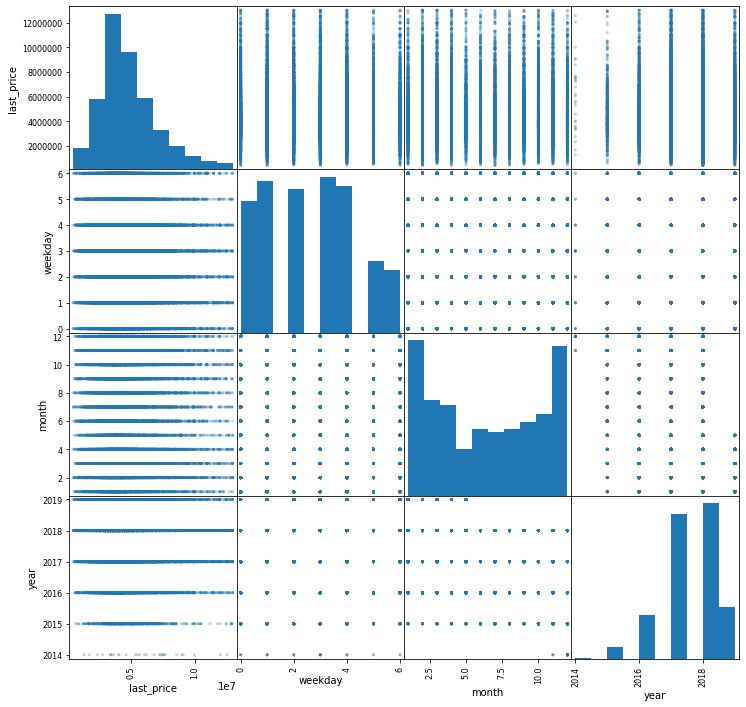

In [74]:
 pd.plotting.scatter_matrix(price_area_weekday_month_year, figsize=(12,12), alpha=0.3)

In [75]:
price_area_weekday_month_year.corr()

Столбец,last_price,weekday,month,year
Столбец,,,,
last_price,1.000000,-0.010942,-0.000504,0.032655
weekday,-0.010942,1.000000,0.011952,-0.013493
month,-0.000504,0.011952,1.000000,-0.288179
year,0.032655,-0.013493,-0.288179,1.000000


Из графиков и коээффициентов корреляции видно, что связь отсутствует.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Технически анализ корреляции сделан хорошо. Только в него нужно добавить дополнительные параметры, а также рассмотреть корреляцию по более полным данным.
    
</div>

4. Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

In [76]:
locality_name_top = df.pivot_table(index = 'locality_name', values = 'price_m2', aggfunc = ('count', 'mean'))
locality_name_top10 = locality_name_top.sort_values(by='count', ascending=False).head(10)
print(locality_name_top10)
print('Максимальная стоимсоть жилья', locality_name_top10.sort_values(by='mean',ascending=False).head(1).index.tolist())
print('Минимальная стоимость жилья', locality_name_top10.sort_values(by='mean',ascending=True).head(1).index.tolist())


                   count           mean
locality_name                          
санкт-петербург  15770.0  114784.747242
мурино             590.0   86087.055932
кудрово            472.0   95324.476695
шушары             440.0   78676.904545
всеволожск         398.0   68654.007538
пушкин             369.0  103125.373984
колпино            338.0   75424.150888
парголово          327.0   90175.489297
гатчина            307.0   68745.693811
выборг             237.0   58141.489451
Максимальная стоимсоть жилья ['санкт-петербург']
Минимальная стоимость жилья ['выборг']


Итак, в Санкт-Петербурге самое дорогое жилье, вне города дороже всего в Пушкине, а в Выборге наиболее дешевое, что скорее всего связано с его наибольшей удаленностью от города.

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Сам анализ технически сделан верно. Но ты получил не совсем точные числа, т.к у нас есть неточности в написании названий населенных пунктов. Например Шушары и Кудрово, где-то названы поселком/деревней, а где-то - нет. Это можно было обработать. Вообще названия написанные произвольно - это всегда проблемы. Могут быть опечатки, можно по разному писать само название, можно заменять е и ё, делатиь лишние пробелы и.т.п. В общем такие поля всегда требуют особого внимания
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**
    
Поправил названия и увидел, что в Пушкине цена за кв. метр близка к цене в городе.

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Ок, теперь цифры корректные получились
    
</div>

5. Теперь изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге locality_name_city. Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

Столбец,last_price
count,3.000000e+01
mean,8.298718e+06
std,5.157976e+06
min,3.575000e+06
25%,4.978685e+06
50%,5.974929e+06
75%,1.170957e+07
max,2.344232e+07


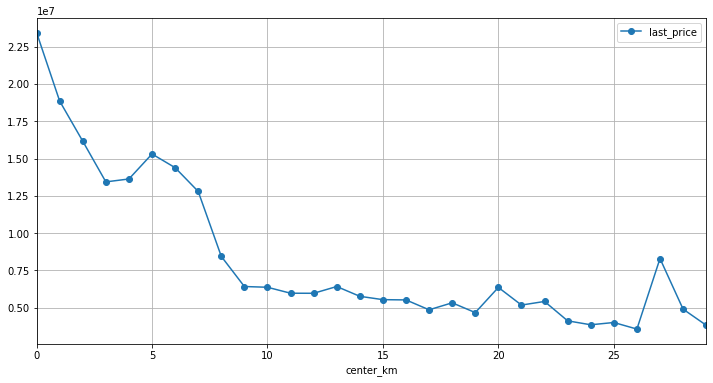

In [77]:
df['center_km'] = df['city_centers_nearest'] / 1000
df['center_km'] = df['center_km'].astype('int')
locality_name_city = df.query('in_city == True')
locality_name_city_price_km = locality_name_city.pivot_table(index='center_km', values='last_price', aggfunc='mean')
locality_name_city_price_km.plot(y='last_price', style='o-', figsize=(12,6), grid=True)
locality_name_city_price_km.describe()

В пределах 9 км график идет стремительно вниз, после незначительно опускается, можно сделать вывод, что центр города - это радиус 9 км.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Отлично, центр выделен правильно
    
</div>

6. Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

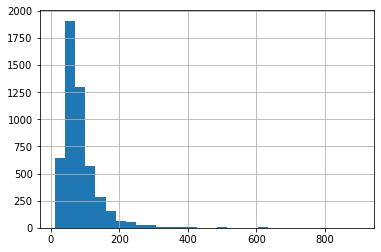

count    5072.000000
mean       84.370166
std        55.970447
min        12.000000
25%        49.175000
50%        71.000000
75%       100.000000
max       900.000000
Name: total_area, dtype: float64

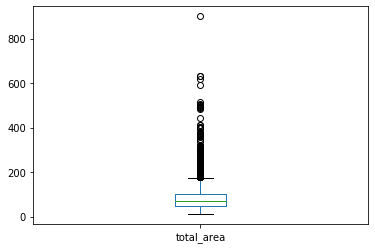

In [78]:
locality_name_city_center = locality_name_city.query('center_km <= 9')
analize(locality_name_city_center['total_area'])

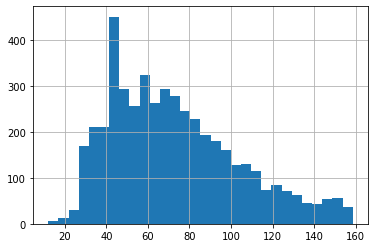

count    4700.000000
mean       72.877723
std        30.754465
min        12.000000
25%        47.500000
50%        68.000000
75%        92.000000
max       158.600000
Name: total_area, dtype: float64

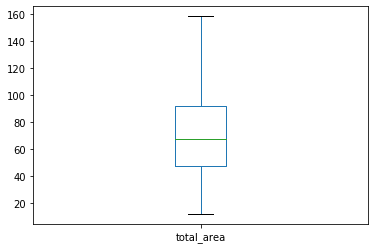

In [79]:
city_center_area = locality_name_city_center.query('total_area < 159')
analize(city_center_area['total_area'])

In [80]:
center_city_city_area = pd.DataFrame(
    [city_center_area['total_area'].describe().tolist(),
     good_total_area['total_area'].describe().tolist()],
    columns = ['количество', 'среднее', 'std', 'min', '25%', 'median', '75%', 'max'],
    index = ['center','city']
)
center_city_city_area

,количество,среднее,std,min,25%,median,75%,max
center,4700.0,72.877723,30.754465,12.0,47.5,68.0,92.0,158.6
city,21917.0,53.046917,17.684990,12.0,39.0,50.0,64.0,101.0


Корридор площади квартир в центре гораздо шире, чем во всем городе, здесь уже 159 против 100. В среднем и по медиане также выше. По медиане на 18 кв. метров, а это вполне целая комната по площади.

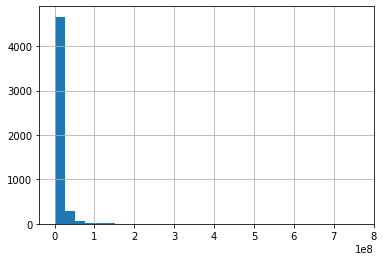

count    5.072000e+03
mean     1.276984e+07
std      2.154653e+07
min      1.219000e+04
25%      5.700000e+06
50%      8.200000e+06
75%      1.276250e+07
max      7.630000e+08
Name: last_price, dtype: float64

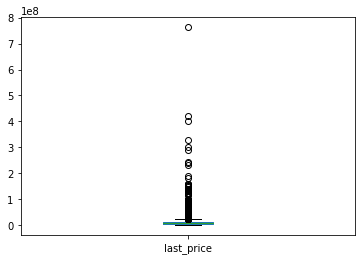

In [81]:
analize(locality_name_city_center['last_price'])

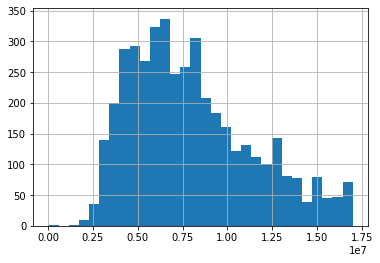

count    4.311000e+03
mean     8.015362e+06
std      3.432920e+06
min      1.219000e+04
25%      5.343000e+06
50%      7.400000e+06
75%      1.000000e+07
max      1.700000e+07
Name: last_price, dtype: float64

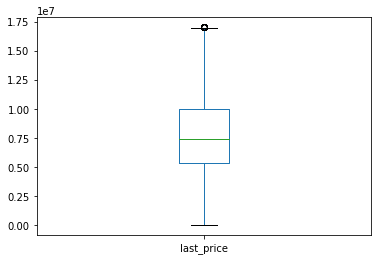

In [82]:
city_center_price = locality_name_city_center.query('last_price < 17100000')
analize(city_center_price['last_price'])

In [83]:
center_city_city_price = pd.DataFrame(
    [city_center_price['last_price'].describe().tolist(),
     good_last_price['last_price'].describe().tolist()],
    columns = ['количество', 'среднее', 'std', 'min', '25%', 'median', '75%', 'max'],
    index = ['center','city']
)
center_city_city_price

,количество,среднее,std,min,25%,median,75%,max
center,4311.0,8.015362e+06,3.432920e+06,12190.0,5343000.0,7400000.0,10000000.0,17000000.0
city,22063.0,4.986647e+06,2.433131e+06,12190.0,3350000.0,4490000.0,6150000.0,13000000.0


Цены также выше, медианное значение выше на 3 млн., также как и среднее. Интересно, что минимальное значение совпадает, значит это цена в центре, явно она не может быть такой маленькой. Скорее всего цена указана в usd.

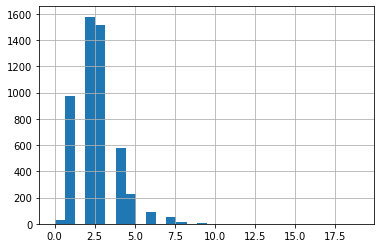

count    5072.000000
mean        2.626577
std         1.388088
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

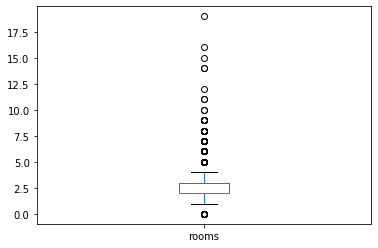

In [84]:
analize(locality_name_city_center['rooms'])

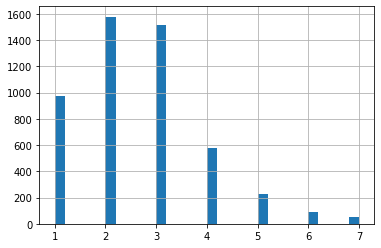

count    5018.000000
mean        2.600239
std         1.248805
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

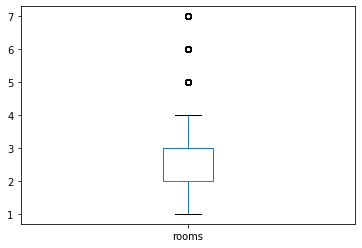

In [85]:
city_center_rooms = locality_name_city_center.query('0 < rooms < 7.5')
analize(city_center_rooms['rooms'])

In [86]:
center_city_city_rooms = pd.DataFrame(
    [city_center_rooms['rooms'].describe().tolist(),
     good_rooms['rooms'].describe().tolist()],
    columns = ['количество', 'среднее', 'std', 'min', '25%', 'median', '75%', 'max'],
    index = ['center','city']
)
center_city_city_rooms

,количество,среднее,std,min,25%,median,75%,max
center,5018.0,2.600239,1.248805,1.0,2.0,2.0,3.0,7.0
city,23609.0,2.047905,1.006772,0.0,1.0,2.0,3.0,6.0


Если сравнивать количество комнат, то примерно одинаковое распределение, но учитывая, что площадь в центре в среднем больше, то это означает, что комнаты в центре больше.

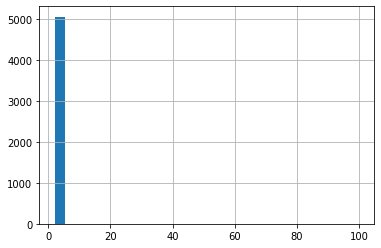

count    5072.000000
mean        2.921483
std         1.601335
min         2.000000
25%         2.650000
50%         2.700000
75%         3.000000
max       100.000000
Name: ceiling_height, dtype: float64

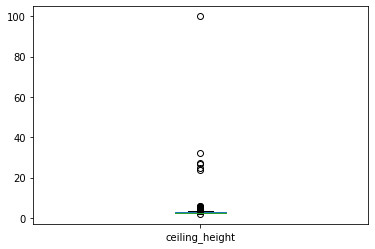

In [87]:
analize(locality_name_city_center['ceiling_height'])

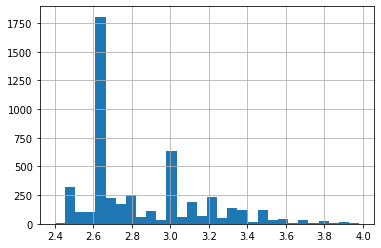

count    4999.000000
mean        2.859542
std         0.301033
min         2.400000
25%         2.650000
50%         2.700000
75%         3.000000
max         3.980000
Name: ceiling_height, dtype: float64

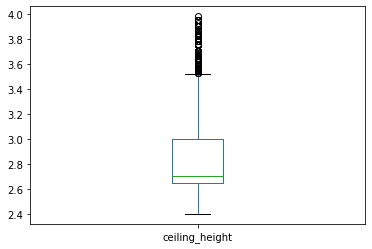

In [88]:
city_center_ceiling_height = locality_name_city_center.query('2.4 <= ceiling_height < 4')
analize(city_center_ceiling_height['ceiling_height'])

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Опять же здесь полезна была бы функция, написаная ранее
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**
    
Применил=)

</div>

In [89]:
center_city_city_ceiling_height = pd.DataFrame(
    [city_center_ceiling_height['ceiling_height'].describe().tolist(),
     good_ceiling_height['ceiling_height'].describe().tolist()],
    columns = ['количество', 'среднее', 'std', 'min', '25%', 'median', '75%', 'max'],
    index = ['center','city']
)
center_city_city_ceiling_height

,количество,среднее,std,min,25%,median,75%,max
center,4999.0,2.859542,0.301033,2.40,2.65,2.70,3.0,3.98
city,23476.0,2.688740,0.187756,2.45,2.60,2.65,2.7,3.70


Высота потолков в среднем чуть выше в центре(за счет исторических построек с высоким потолком), но в целом высота схожа в центре и городе. Выбросы оставляем, т.к. это влияет на выборку. ОбЪединим все очищенные данные от выбросов и исследуем их.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f497d9c3d50>,
      dtype=object)

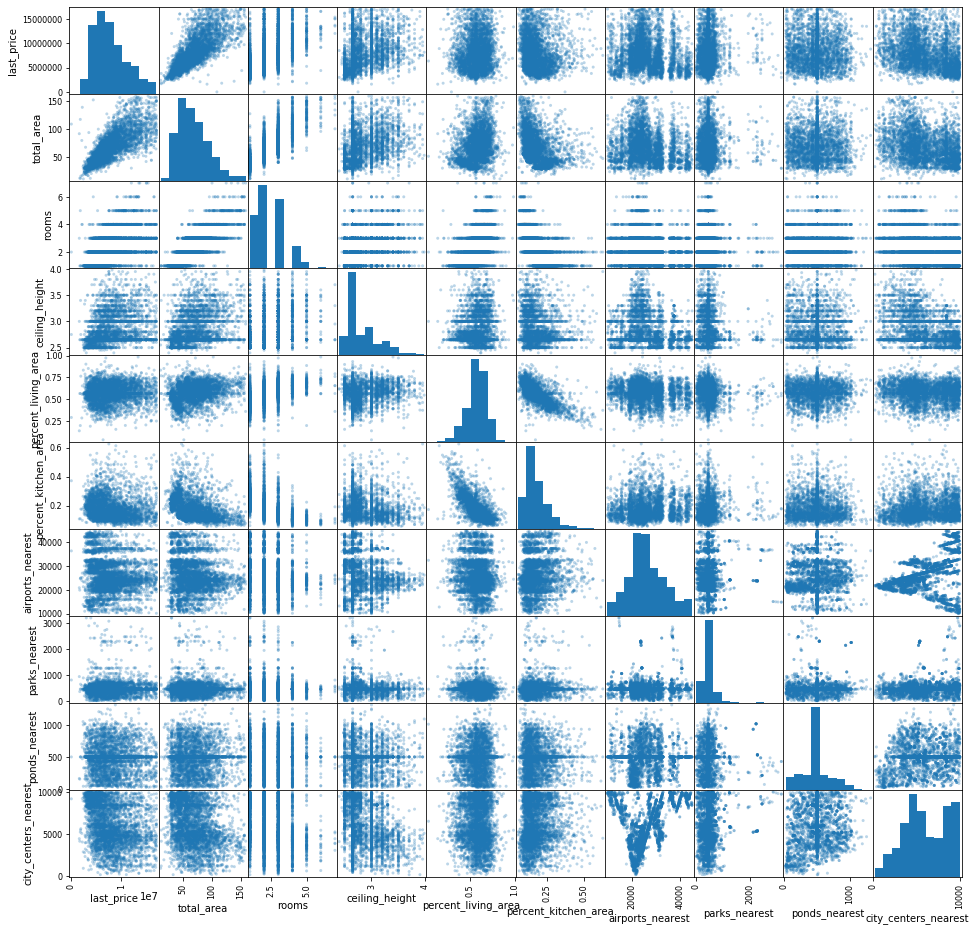

In [90]:
city_center_good = locality_name_city_center.query(
    'total_area < 159 and last_price < 17100000 and 0 < rooms < 7.5 and 2.4 <= ceiling_height < 4')
city_center_good_table = city_center_good[['last_price', 'total_area', 'rooms','ceiling_height','percent_living_area', 'percent_kitchen_area', 'airports_nearest','parks_nearest','ponds_nearest', 'city_centers_nearest']]
pd.plotting.scatter_matrix(city_center_good_table, figsize=(16,16), alpha=0.3)

In [91]:
city_center_good_table.corr()

Столбец,last_price,total_area,rooms,ceiling_height,percent_living_area,percent_kitchen_area,airports_nearest,parks_nearest,ponds_nearest,city_centers_nearest
Столбец,,,,,,,,,,
last_price,1.000000,0.763877,0.517255,0.290407,0.035477,-0.103035,-0.144881,0.044890,-0.040873,-0.324099
total_area,0.763877,1.000000,0.811492,0.325576,0.237725,-0.355685,-0.153049,0.003135,-0.012629,-0.325315
rooms,0.517255,0.811492,1.000000,0.261729,0.503557,-0.545633,-0.169068,-0.057870,-0.007876,-0.277265
ceiling_height,0.290407,0.325576,0.261729,1.000000,0.095026,-0.080368,-0.159707,-0.074665,-0.042210,-0.349094
percent_living_area,0.035477,0.237725,0.503557,0.095026,1.000000,-0.714963,-0.112241,-0.092877,0.021302,-0.078694
percent_kitchen_area,-0.103035,-0.355685,-0.545633,-0.080368,-0.714963,1.000000,0.098791,0.059891,-0.027254,0.063855
airports_nearest,-0.144881,-0.153049,-0.169068,-0.159707,-0.112241,0.098791,1.000000,0.023711,0.007992,0.388171
parks_nearest,0.044890,0.003135,-0.057870,-0.074665,-0.092877,0.059891,0.023711,1.000000,0.015507,0.085573
ponds_nearest,-0.040873,-0.012629,-0.007876,-0.042210,0.021302,-0.027254,0.007992,0.015507,1.000000,0.167334


In [92]:
city_good_table = df_good_days_exposition[['last_price', 'total_area', 'rooms', 'ceiling_height', 'airports_nearest', 'city_centers_nearest']]
city_good_table.corr()

Столбец,last_price,total_area,rooms,ceiling_height,airports_nearest,city_centers_nearest
Столбец,,,,,,
last_price,1.000000,0.693145,0.418290,0.349691,0.014576,-0.219420
total_area,0.693145,1.000000,0.797830,0.247251,-0.002107,-0.089789
rooms,0.418290,0.797830,1.000000,0.061098,-0.029861,-0.050259
ceiling_height,0.349691,0.247251,0.061098,1.000000,-0.059202,-0.206037
airports_nearest,0.014576,-0.002107,-0.029861,-0.059202,1.000000,0.265371
city_centers_nearest,-0.219420,-0.089789,-0.050259,-0.206037,0.265371,1.000000


Сравним результаты с результатами по городу:
1. цена с площадью явно коррелирует, это видно и на графике и по коэффициенту, причем сильнее, чем по городу (0,76 против 0,69)
2. сильнее зависит цена и от числа комнат (0,51 против 0,41)
3. высота потолка по городу сильнее влияет на цену, чем в центре, но все равно важна
4. цена не сильно зависит от удаленности от аэропорта в центре, но все же зависимость есть и выше в 10 раз по сравнению с городом
5. зависимость от удаленности от центра одинаково серьезно влияет на цену, как в центре, так и в городе, но учитывая ценовой сегмент центра, можно сказать, что в центр сильно вносит корректив на статистику города в целом

In [93]:
floor_price_center = city_center_good.pivot_table(index='floor_category', values='last_price', aggfunc=('median','count','mean','std'))
display(floor_price_center.merge(floor_price, on='floor_category',suffixes=('_center', '_city')))

,count_center,mean_center,median_center,std_center,count_city,mean_city,median_city,std_city
floor_category,,,,,,,,
другой,3029.0,8.150691e+06,7545600.0,3.367453e+06,15139.0,5.026162e+06,4550000.0,2.240517e+06
первый,482.0,6.530670e+06,5900000.0,2.836697e+06,2624.0,4.060053e+06,3775000.0,2.017054e+06
последний,673.0,7.905304e+06,7350000.0,3.308348e+06,2794.0,4.428257e+06,4000000.0,2.343536e+06


В отличии от всего города, последний этаж в центре чаще встречается, чем первый, т.к. на первом этаже чаще коммерческие площади, также цена на последний этаж не уступает цене на другом этаже, тогда как первый этаж также менее интересен при покупке, как и по городу.

Столбец,last_price
count,1.000000e+01
mean,8.257034e+06
std,1.169866e+06
min,5.851303e+06
25%,7.725404e+06
50%,8.472742e+06
75%,9.075685e+06
max,9.521566e+06


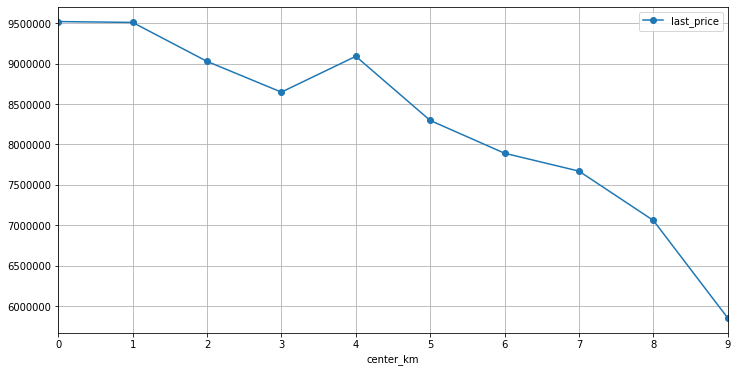

In [94]:
locality_name_city_price_km_center = city_center_good.pivot_table(index='center_km', values='last_price', aggfunc='mean')
locality_name_city_price_km_center.plot(y='last_price', style='o-', figsize=(12,6), grid=True)
locality_name_city_price_km_center.describe()

In [95]:
center_city_city_km_center = pd.DataFrame(
    [locality_name_city_price_km_center['last_price'].describe().tolist(),
     locality_name_city_price_km['last_price'].describe().tolist()],
    columns = ['количество', 'среднее', 'std', 'min', '25%', 'median', '75%', 'max'],
    index = ['center','city']
)
center_city_city_km_center

,количество,среднее,std,min,25%,median,75%,max
center,10.0,8.257034e+06,1.169866e+06,5.851303e+06,7.725404e+06,8.472742e+06,9.075685e+06,9.521566e+06
city,30.0,8.298718e+06,5.157976e+06,3.575000e+06,4.978685e+06,5.974929e+06,1.170957e+07,2.344232e+07


В отличии от остальной части города, цена на жилье с каждым километром растет более интенсивно, цены на порядок выше: средняя цена в городе 6 млн. руб., в центре же это минимальная цена, а средняя 8,5 млн. руб.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f497c489e50>,
      dtype=object)

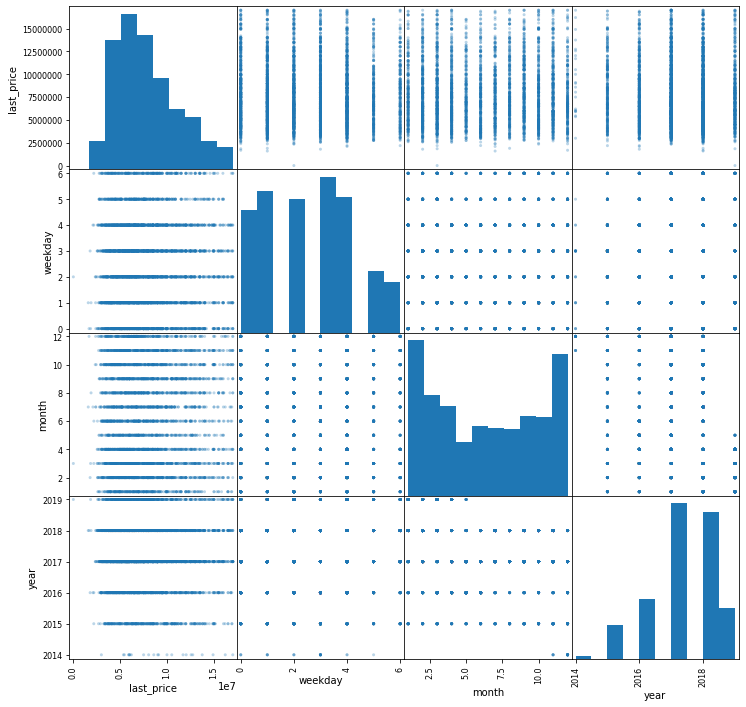

In [96]:
price_area_weekday_month_year_center = city_center_good[['last_price', 'weekday', 'month', 'year']]
pd.plotting.scatter_matrix(price_area_weekday_month_year_center, figsize=(12,12), alpha=0.3)

In [97]:
price_area_weekday_month_year_center.corr()

Столбец,last_price,weekday,month,year
Столбец,,,,
last_price,1.000000,-0.013868,0.021168,-0.033553
weekday,-0.013868,1.000000,0.025831,0.010301
month,0.021168,0.025831,1.000000,-0.254791
year,-0.033553,0.010301,-0.254791,1.000000


In [98]:
price_area_weekday_month_year.corr()

Столбец,last_price,weekday,month,year
Столбец,,,,
last_price,1.000000,-0.010942,-0.000504,0.032655
weekday,-0.010942,1.000000,0.011952,-0.013493
month,-0.000504,0.011952,1.000000,-0.288179
year,0.032655,-0.013493,-0.288179,1.000000


Вне зависимости от даты выставления объявления, корреляции нет, как и в случае с городом в целом.

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

В целом для центра такие же претензии, как и для города в целом. посмотри, не удаляем ли мы слишком много данных, посмотри и другие параметры для корреляции.

Также можно было сделать сравнительные таблицы для города и центра, а также сравниетельные гистограммы. Чтоб для сравнения не нужно ыбло пролистывать весь проект вверх
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**
    
Постарался максимально сравнить центр и город, выводы поправил.

</div>

## Общий вывод

В ходе исследования были выялены следующие результаты:

1. В среднем по городу квартира продается в течение 84 дней, быстрая продажа до 39 дней, а долгая свыше 197 дней.
2. По городу четкая корреляция прослеживается между площадью квартиры и ее стоимостью, что подтверждает коэффициент корреляции. Гораздо ниже корреляция с количетвом комнат. Зависимость стоимости с удаленностью от центра также присутствует, только в центре это ощутимей, с каждым километром стоимость возрастает на 1 млн., в центре также важна удаленность аэропорта.
3. Первый этаж и последний этаж по стоимости ниже, чем любой другой этаж вне центра города, первый наименее привлекателен для покупки, поэтому и стоимости наболее низкая. В центре города последний этаж по стоимости не уступает другим, первый этаж мало заселен из-за коммерческой площади и менее привлекателен для покупки.
4. Из 10 наиболее распространенных по количеству объявлений для покупки жилья населенных пунктовв Санкт-Петербурге самое дорогое жилье, при этом в Пушкине стоимость практически приближается к городской, а в Выборге наиболее дешевое, что скорее всего связано с его наибольшей удаленностью от города.
5. В пределах 9 км стоимость жилья на порядок выше, это центр города. Цена выше: верхняя планка 17 млн. против 9 млн. по городу, а средняя цена в центре 8,2 млн. руб. против 6 млн. по городу.
6. Корридор площади квартир в центре гораздо шире, чем во всем городе, здесь уже 159 м2 против 100 м2, средняя площадь больше на 18 м2, при этом количество комнат распределяется примерно одинаково, что говорит о том, что в центре комнаты больше.
7. Вне зависимости от даты выставления объявления, корреляции между ценой и датой выставления нет, как в случае с центром города, так и в случае с городом в целом.
13. Если сравнивать результаты исследования центра города по зависимости цены, площади, количеству комнат и высоте потолка с результатами по городу, то видно, что цена с площадью явно коррелирует, причем сильнее, чем по городу (0,76 против 0,69), также сильнее зависит цена и от числа комнат (0,51 против 0,41), а высота потолка одинаково влияет на цену как в центре города, так и по всему городу меньше, при этом высота потолков в центре города чуть выше по распределению.


<div style="border:solid green 2px; padding: 20px"> 

**Общий комментарий по проекту**

Ты отлично поработал над проектом, молодец. Это хороший первый шаг, ты в целом правильно подошел к анализу, но допустил небольшие технические неточности.
    
Поправь, пожалуйста по комментариям, чтоб я могла принять проект.
Ты молодец, отлично справляешься с программой. Удачи.
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента - 1**
    
Спасибо тебе за наставления, из-за работы чуть подзадержался со сдачей, надеюсь наверстать=)

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Проект отлично доработан, молодец
    
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод